Chris's additions / look at Zak's Code

cwaigl@alaska.edu

In [6]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import xeofs as xe
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.signal import detrend
from eofs.xarray import Eof
from pathlib import Path

### Datapaths and data

In [27]:
projectdir = Path().absolute()
datadir = projectdir / 'data'
fn = 'msl_60_90N_1940_2025.nc'
datapath = datadir / fn

startyr = 1980
endyr = 2022

In [28]:
with xr.open_dataset(datapath) as src:
        msl = src.sel(valid_time=slice(f'{startyr}-04-01', f'{endyr}-10-01')).msl


### Chris's code

In [29]:
msl = msl/100
msl.attrs['units'] = 'hPa'
msl = msl.drop(['expver', 'number'])
msl

/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_34297/1199764630.py:3: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  msl = msl.drop(['expver', 'number'])


<xarray.DataArray 'msl' (valid_time: 511, latitude: 121, longitude: 1440)> Size: 356MB
array([[[1021.52625, 1021.52625, 1021.52625, ..., 1021.52625,
         1021.52625, 1021.52625],
        [1021.8575 , 1021.8575 , 1021.85626, ..., 1021.85876,
         1021.8575 , 1021.8575 ],
        [1022.1863 , 1022.185  , 1022.185  , ..., 1022.1887 ,
         1022.1875 , 1022.1875 ],
        ...,
        [1006.73   , 1006.6    , 1006.46625, ..., 1007.085  ,
         1006.97125, 1006.85   ],
        [1006.34   , 1006.225  , 1006.105  , ..., 1006.675  ,
         1006.5662 , 1006.45874],
        [1005.9575 , 1005.85126, 1005.74   , ..., 1006.26874,
         1006.16626, 1006.065  ]],

       [[1025.44   , 1025.44   , 1025.44   , ..., 1025.44   ,
         1025.44   , 1025.44   ],
        [1025.7087 , 1025.7087 , 1025.7087 , ..., 1025.7087 ,
         1025.7087 , 1025.7087 ],
        [1025.98   , 1025.98   , 1025.98   , ..., 1025.98   ,
         1025.98   , 1025.98   ],
...
        [1001.8594 , 1001.78314, 1001.7056 , ..., 1002.08185,
         1002.0069 , 1001.9319 ],
        [1001.89813, 1001.8281 , 1001.7606 , ..., 1002.1069 ,
         1002.03815, 1001.96814],
        [1001.96313, 1001.89935, 1001.83563, ..., 1002.16315,
         1002.09436, 1002.02686]],

       [[1009.36   , 1009.36   , 1009.36   , ..., 1009.36   ,
         1009.36   , 1009.36   ],
        [1009.39874, 1009.4    , 1009.40125, ..., 1009.39624,
         1009.3975 , 1009.3975 ],
        [1009.175  , 1009.1775 , 1009.18   , ..., 1009.16876,
         1009.17126, 1009.17377],
        ...,
        [1005.885  , 1005.8812 , 1005.8787 , ..., 1005.89374,
         1005.8875 , 1005.8862 ],
        [1005.8925 , 1005.88873, 1005.8862 , ..., 1005.9    ,
         1005.8975 , 1005.89624],
        [1005.91   , 1005.90375, 1005.9025 , ..., 1005.925  ,
         1005.92   , 1005.915  ]]], dtype=float32)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 4kB 1980-04-01 ... 2022-10-01
  * latitude    (latitude) float64 968B 90.0 89.75 89.5 ... 60.5 60.25 60.0
  * longitude   (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
Attributes: (12/32)
    GRIB_paramId:                             151
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      174240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avgua
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               Pa
    long_name:                                Mean sea level pressure
    units:                                    hPa
    standard_name:                            air_pressure_at_mean_sea_level
    GRIB_surface:                             0.0

We resample the data to quarterly with end in February (DJF, MAM, JJA, SON). Winter is the data that ends at month = 2, summer with month = 8.

In [30]:
msl_quarterly = msl.resample(valid_time='QE-FEB').mean(dim="valid_time")
msl_quarterly_prime = msl.resample(valid_time='QE-JAN').mean(dim="valid_time")
msl_quarterly

<xarray.DataArray 'msl' (valid_time: 171, latitude: 121, longitude: 1440)> Size: 119MB
array([[[1023.4831 , 1023.4831 , 1023.4831 , ..., 1023.4831 ,
         1023.4831 , 1023.4831 ],
        [1023.7831 , 1023.7831 , 1023.7825 , ..., 1023.78375,
         1023.7831 , 1023.7831 ],
        [1024.0831 , 1024.0825 , 1024.0825 , ..., 1024.0844 ,
         1024.0837 , 1024.0837 ],
        ...,
        [1006.1881 , 1006.0706 , 1005.9513 , ..., 1006.5156 ,
         1006.4081 , 1006.2981 ],
        [1005.8331 , 1005.725  , 1005.6156 , ..., 1006.14874,
         1006.04565, 1005.9437 ],
        [1005.485  , 1005.3825 , 1005.27875, ..., 1005.7881 ,
         1005.6875 , 1005.58813]],

       [[1009.805  , 1009.805  , 1009.805  , ..., 1009.805  ,
         1009.805  , 1009.805  ],
        [1009.6758 , 1009.6763 , 1009.6766 , ..., 1009.67413,
         1009.675  , 1009.6755 ],
        [1009.5671 , 1009.56836, 1009.56915, ..., 1009.56464,
         1009.56494, 1009.5662 ],
...
        [1010.9931 , 1011.00146, 1011.00977, ..., 1010.9519 ,
         1010.9639 , 1010.97943],
        [1011.034  , 1011.04315, 1011.05396, ..., 1010.99945,
         1011.0119 , 1011.0239 ],
        [1011.07733, 1011.0881 , 1011.09814, ..., 1011.0489 ,
         1011.0573 , 1011.0661 ]],

       [[1011.60095, 1011.60095, 1011.60095, ..., 1011.60095,
         1011.60095, 1011.60095],
        [1011.57654, 1011.5772 , 1011.5784 , ..., 1011.5747 ,
         1011.5759 , 1011.5759 ],
        [1011.4265 , 1011.4278 , 1011.4297 , ..., 1011.42285,
         1011.4241 , 1011.4253 ],
        ...,
        [1003.8722 , 1003.83215, 1003.7922 , ..., 1003.9878 ,
         1003.9472 , 1003.90906],
        [1003.8953 , 1003.8584 , 1003.8234 , ..., 1004.0034 ,
         1003.96783, 1003.9322 ],
        [1003.9365 , 1003.90155, 1003.8691 , ..., 1004.04407,
         1004.0072 , 1003.97095]]], dtype=float32)
Coordinates:
  * latitude    (latitude) float64 968B 90.0 89.75 89.5 ... 60.5 60.25 60.0
  * longitude   (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
  * valid_time  (valid_time) datetime64[ns] 1kB 1980-05-31 ... 2022-11-30
Attributes: (12/32)
    GRIB_paramId:                             151
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      174240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avgua
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               Pa
    long_name:                                Mean sea level pressure
    units:                                    hPa
    standard_name:                            air_pressure_at_mean_sea_level
    GRIB_surface:                             0.0

In [31]:
msl_quarterly_prime

<xarray.DataArray 'msl' (valid_time: 171, latitude: 121, longitude: 1440)> Size: 119MB
array([[[1021.52625, 1021.52625, 1021.52625, ..., 1021.52625,
         1021.52625, 1021.52625],
        [1021.8575 , 1021.8575 , 1021.85626, ..., 1021.85876,
         1021.8575 , 1021.8575 ],
        [1022.1863 , 1022.185  , 1022.185  , ..., 1022.1887 ,
         1022.1875 , 1022.1875 ],
        ...,
        [1006.73   , 1006.6    , 1006.46625, ..., 1007.085  ,
         1006.97125, 1006.85   ],
        [1006.34   , 1006.225  , 1006.105  , ..., 1006.675  ,
         1006.5662 , 1006.45874],
        [1005.9575 , 1005.85126, 1005.74   , ..., 1006.26874,
         1006.16626, 1006.065  ]],

       [[1017.21515, 1017.21515, 1017.21515, ..., 1017.21515,
         1017.21515, 1017.21515],
        [1017.28687, 1017.2873 , 1017.28766, ..., 1017.28516,
         1017.2861 , 1017.28644],
        [1017.366  , 1017.36725, 1017.36816, ..., 1017.3631 ,
         1017.36395, 1017.36523],
...
        [1014.2437 , 1014.2429 , 1014.2421 , ..., 1014.2254 ,
         1014.2308 , 1014.238  ],
        [1014.28046, 1014.2808 , 1014.2825 , ..., 1014.27   ,
         1014.27496, 1014.2791 ],
        [1014.3196 , 1014.32   , 1014.3213 , ..., 1014.31836,
         1014.31836, 1014.3188 ]],

       [[1011.50226, 1011.50226, 1011.50226, ..., 1011.50226,
         1011.50226, 1011.50226],
        [1011.44354, 1011.44403, 1011.4451 , ..., 1011.4419 ,
         1011.4427 , 1011.4431 ],
        [1011.2998 , 1011.301  , 1011.30225, ..., 1011.2961 ,
         1011.29736, 1011.2986 ],
        ...,
        [1005.7698 , 1005.7461 , 1005.7222 , ..., 1005.83185,
         1005.8094 , 1005.78937],
        [1005.82477, 1005.80396, 1005.78436, ..., 1005.8831 ,
         1005.8643 , 1005.84564],
        [1005.8923 , 1005.87354, 1005.85565, ..., 1005.9506 ,
         1005.9302 , 1005.9102 ]]], dtype=float32)
Coordinates:
  * latitude    (latitude) float64 968B 90.0 89.75 89.5 ... 60.5 60.25 60.0
  * longitude   (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
  * valid_time  (valid_time) datetime64[ns] 1kB 1980-04-30 ... 2022-10-31
Attributes: (12/32)
    GRIB_paramId:                             151
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      174240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avgua
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               Pa
    long_name:                                Mean sea level pressure
    units:                                    hPa
    standard_name:                            air_pressure_at_mean_sea_level
    GRIB_surface:                             0.0

In [32]:
msl_winter = msl_quarterly.sel(valid_time=msl_quarterly['valid_time.month']==2).groupby('valid_time.year').mean()
msl_summer = msl_quarterly.sel(valid_time=msl_quarterly['valid_time.month']==8).groupby('valid_time.year').mean()
msl_spring = msl_quarterly.sel(valid_time=msl_quarterly['valid_time.month']==5).groupby('valid_time.year').mean()
msl_autumn = msl_quarterly.sel(valid_time=msl_quarterly['valid_time.month']==11).groupby('valid_time.year').mean()
# msl_test = msl_quarterly_prime.sel(valid_time=msl_quarterly_prime['valid_time.month']==12).groupby('valid_time.year').mean()
msl_test = msl_quarterly_prime.sel(valid_time=msl_quarterly_prime['valid_time.month']==1).groupby('valid_time.year').mean()


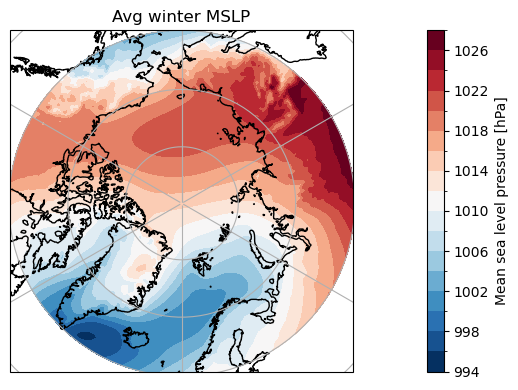

In [33]:
msl_winter_avg = msl_winter.mean(dim='year')
msl_summer_avg = msl_summer.mean(dim='year')
msl_spring_avg = msl_spring.mean(dim='year')
msl_autumn_avg = msl_autumn.mean(dim='year')
msl_test_avg = msl_test.mean(dim='year')

fig = plt.figure(figsize=(15, 4),)
ax = plt.axes( projection=ccrs.NorthPolarStereo())
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())

msl_winter_avg.plot.contourf(transform=ccrs.PlateCarree(), 
                             cmap='RdBu_r', levels=20, ax=ax)
ax.add_feature(cfeature.COASTLINE)
ax.gridlines()
ax.set_title("Avg winter MSLP")
plt.tight_layout()

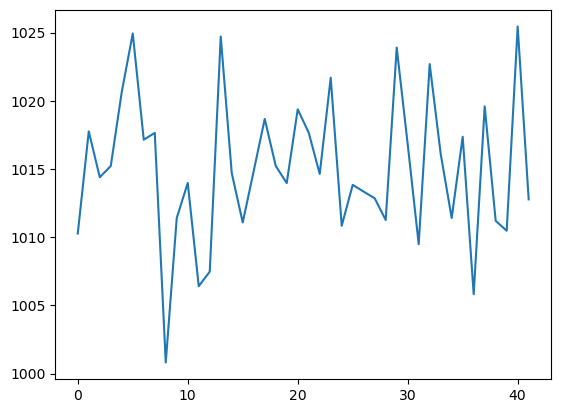

In [57]:
plt.plot(msl_winter[:, 2, 2])

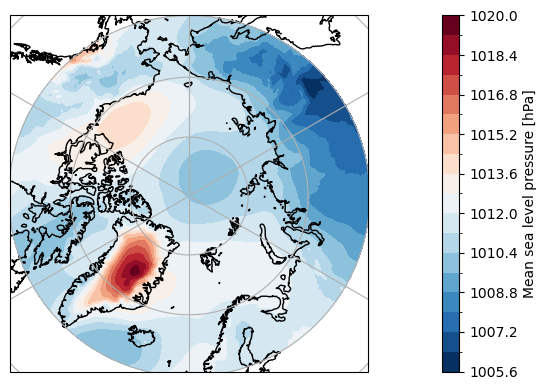

In [58]:
fig = plt.figure(figsize=(15, 4),)
ax = plt.axes( projection=ccrs.NorthPolarStereo())
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())

msl_summer_avg.plot.contourf(transform=ccrs.PlateCarree(), 
                             cmap='RdBu_r', levels=20, ax=ax)
ax.add_feature(cfeature.COASTLINE)
ax.gridlines()
plt.tight_layout()


In [59]:
#summer modes 

sumr_model = xe.single.EOF(n_modes=2, use_coslat=True)
sumr_model.fit(msl_summer-msl_summer_avg, dim='year')
sumr_eofs = sumr_model.components()
sumr_pcs = sumr_model.scores()
sumr_expvar = sumr_model.explained_variance_ratio()

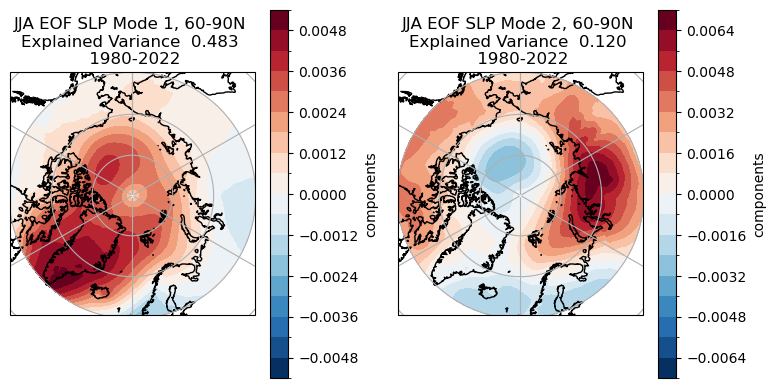

In [60]:
fig = plt.figure(figsize=(15, 4))
for i in range(2):
   ax = plt.subplot(1, 4, i+1, projection=ccrs.NorthPolarStereo())
   sumr_eofs.isel(mode=i).plot.contourf(transform=ccrs.PlateCarree(), levels=20, ax=ax)
   ax.add_feature(cfeature.COASTLINE)
   ax.gridlines()
   ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
   ax.set_title(f"JJA EOF SLP Mode {i+1}, 60-90N \nExplained Variance {sumr_expvar[i].values: .3f} \n {startyr}-{endyr}")
plt.tight_layout()
plt.show()

In [61]:
wintr_model = xe.single.EOF(n_modes=2, use_coslat=True)
wintr_model.fit(msl_winter-msl_winter_avg, dim='year')
wintr_eofs = wintr_model.components()
wintr_pcs = wintr_model.scores()
wintr_expvar = wintr_model.explained_variance_ratio()

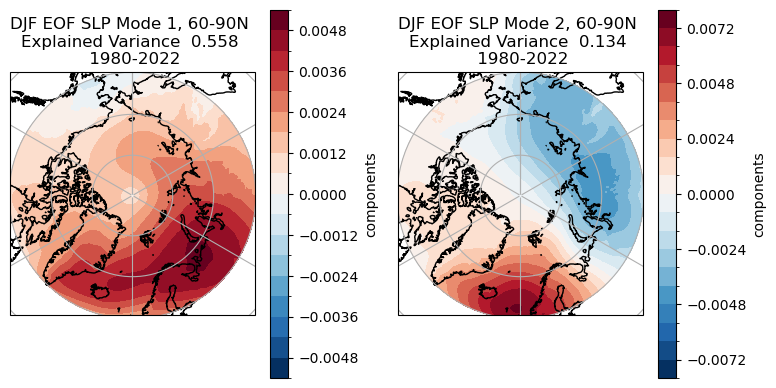

In [62]:
fig = plt.figure(figsize=(15, 4))
for i in range(2):
   ax = plt.subplot(1, 4, i+1, projection=ccrs.NorthPolarStereo())
   wintr_eofs.isel(mode=i).plot.contourf(transform=ccrs.PlateCarree(), levels=20, ax=ax)
#sumr_eofs.isel(mode=i).plot(transform=ccrs.PlateCarree(), ax=ax)
   ax.add_feature(cfeature.COASTLINE)
   ax.gridlines()
   ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
   ax.set_title(f"DJF EOF SLP Mode {i+1}, 60-90N \nExplained Variance {wintr_expvar[i].values: .3f} \n {startyr}-{endyr}")
plt.tight_layout()
plt.show()

In [63]:
spring_model = xe.single.EOF(n_modes=2, use_coslat=True)
spring_model.fit(msl_spring-msl_spring_avg, dim='year')
spring_eofs = spring_model.components()
spring_pcs = spring_model.scores()
spring_expvar = spring_model.explained_variance_ratio()

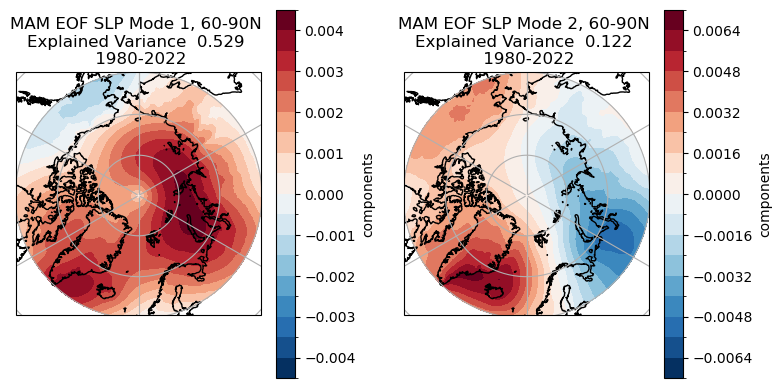

In [64]:
fig = plt.figure(figsize=(15, 4))
for i in range(2):
   ax = plt.subplot(1, 4, i+1, projection=ccrs.NorthPolarStereo())
   spring_eofs.isel(mode=i).plot.contourf(transform=ccrs.PlateCarree(), levels=20, ax=ax)
#sumr_eofs.isel(mode=i).plot(transform=ccrs.PlateCarree(), ax=ax)
   ax.add_feature(cfeature.COASTLINE)
   ax.gridlines()
   ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
   ax.set_title(f"MAM EOF SLP Mode {i+1}, 60-90N \nExplained Variance {spring_expvar[i].values: .3f} \n {startyr}-{endyr}")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'DJF AO (PC2) not normalized')

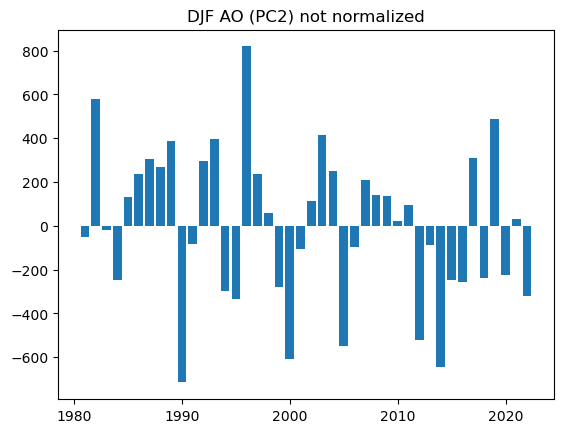

In [65]:
plt.bar(wintr_pcs.year, wintr_pcs.values[1, :], label='PC2')
plt.title("DJF AO (PC2) not normalized")

In [66]:
autumn_model = xe.single.EOF(n_modes=2, use_coslat=True)
autumn_model.fit(msl_autumn-msl_autumn_avg, dim='year')
autumn_eofs = autumn_model.components()
autumn_pcs = autumn_model.scores()
autumn_expvar = autumn_model.explained_variance_ratio()

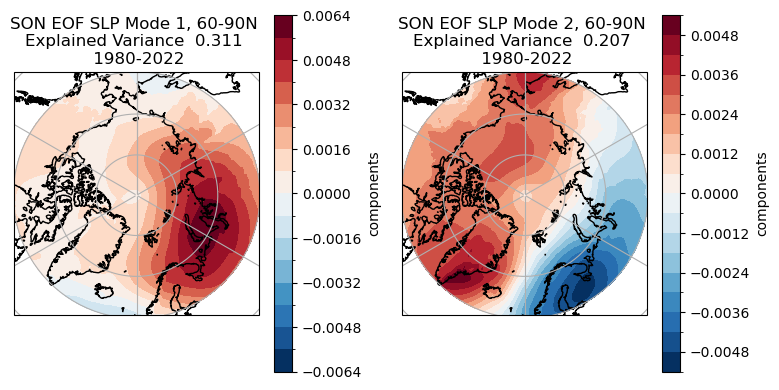

In [67]:
fig = plt.figure(figsize=(15, 4))
for i in range(2):
   ax = plt.subplot(1, 4, i+1, projection=ccrs.NorthPolarStereo())
   autumn_eofs.isel(mode=i).plot.contourf(transform=ccrs.PlateCarree(), levels=20, ax=ax)
#sumr_eofs.isel(mode=i).plot(transform=ccrs.PlateCarree(), ax=ax)
   ax.add_feature(cfeature.COASTLINE)
   ax.gridlines()
   ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
   ax.set_title(f"SON EOF SLP Mode {i+1}, 60-90N \nExplained Variance {autumn_expvar[i].values: .3f} \n {startyr}-{endyr}")
plt.tight_layout()

Text(0.5, 1.0, 'SON AO (PC2) not normalized')

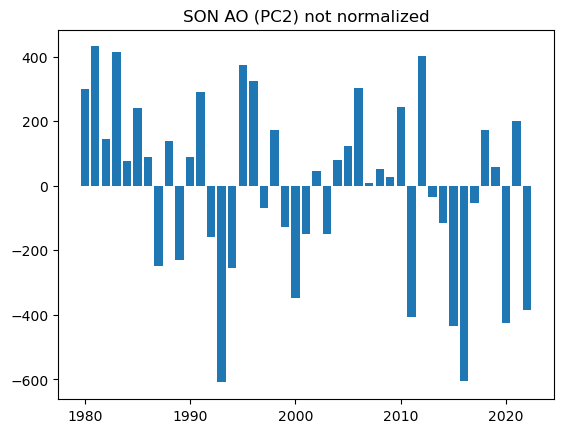

In [45]:
plt.bar(autumn_pcs.year, autumn_pcs.values[1, :], label='PC2')
plt.title("SON AO (PC2) not normalized")

In [46]:
test_model = xe.single.EOF(n_modes=2, use_coslat=True)
test_model.fit(msl_test-msl_test_avg, dim='year')
test_eofs = test_model.components()
test_pcs = test_model.scores()
test_expvar = test_model.explained_variance_ratio()

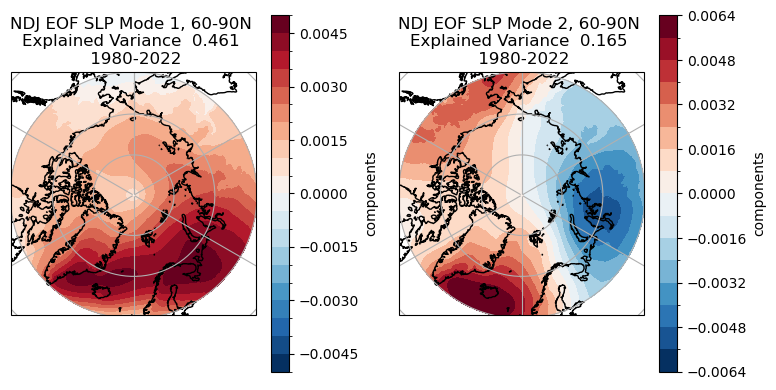

In [47]:
fig = plt.figure(figsize=(15, 4))
for i in range(2):
   ax = plt.subplot(1, 4, i+1, projection=ccrs.NorthPolarStereo())
   im = test_eofs.isel(mode=i).plot.contourf(transform=ccrs.PlateCarree(), levels=20, ax=ax, cmap='RdBu_r')
#sumr_eofs.isel(mode=i).plot(transform=ccrs.PlateCarree(), ax=ax)
   ax.add_feature(cfeature.COASTLINE)
   ax.gridlines()
   ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
   ax.set_title(f"NDJ EOF SLP Mode {i+1}, 60-90N \nExplained Variance {test_expvar[i].values: .3f} \n {startyr}-{endyr}")
plt.tight_layout()

### Chris alternative EOF calculation

In [48]:
msl_summer_prime = msl_quarterly.sel(valid_time=msl_quarterly['valid_time.month']==8)
msl_summer_prime = msl_summer_prime.rename({'valid_time': 'time'})

In [49]:
msl_winter_prime = msl_quarterly.sel(valid_time=msl_quarterly['valid_time.month']==2)
msl_winter_prime = msl_winter_prime.rename({'valid_time': 'time'})
msl_winter_prime

<xarray.DataArray 'msl' (time: 42, latitude: 121, longitude: 1440)> Size: 29MB
array([[[1010.0119 , 1010.0119 , 1010.0119 , ..., 1010.0119 ,
         1010.0119 , 1010.0119 ],
        [1010.1306 , 1010.13104, 1010.13184, ..., 1010.1286 ,
         1010.1294 , 1010.1298 ],
        [1010.264  , 1010.2652 , 1010.2664 , ..., 1010.2602 ,
         1010.2615 , 1010.26227],
        ...,
        [1007.9869 , 1007.89355, 1007.801  , ..., 1008.26105,
         1008.1702 , 1008.07764],
        [1007.4294 , 1007.341  , 1007.25684, ..., 1007.6906 ,
         1007.6043 , 1007.519  ],
        [1006.8919 , 1006.8044 , 1006.72687, ..., 1007.1502 ,
         1007.0644 , 1006.9802 ]],

       [[1017.6838 , 1017.6838 , 1017.6838 , ..., 1017.6838 ,
         1017.6838 , 1017.6838 ],
        [1017.72833, 1017.72955, 1017.7308 , ..., 1017.7246 ,
         1017.7258 , 1017.7271 ],
        [1017.7496 , 1017.75214, 1017.75507, ..., 1017.7425 ,
         1017.74506, 1017.7471 ],
...
        [1000.48755, 1000.45953, 1000.4329 , ..., 1000.5825 ,
         1000.54834, 1000.5171 ],
        [ 999.89087,  999.8659 ,  999.8467 , ...,  999.96246,
          999.93964,  999.91754],
        [ 999.30835,  999.2871 ,  999.2754 , ...,  999.3745 ,
          999.35205,  999.3309 ]],

       [[1012.22296, 1012.22296, 1012.22296, ..., 1012.22296,
         1012.22296, 1012.22296],
        [1012.4971 , 1012.4971 , 1012.49664, ..., 1012.49664,
         1012.4971 , 1012.49664],
        [1012.77045, 1012.7708 , 1012.77124, ..., 1012.77   ,
         1012.77045, 1012.7708 ],
        ...,
        [1007.27875, 1007.2874 , 1007.2967 , ..., 1007.27295,
         1007.26953, 1007.27246],
        [1006.74585, 1006.7591 , 1006.7783 , ..., 1006.71747,
         1006.72504, 1006.7342 ],
        [1006.22   , 1006.23663, 1006.2654 , ..., 1006.1829 ,
         1006.19336, 1006.2046 ]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 968B 90.0 89.75 89.5 89.25 ... 60.5 60.25 60.0
  * longitude  (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
  * time       (time) datetime64[ns] 336B 1981-02-28 1982-02-28 ... 2022-02-28
Attributes: (12/32)
    GRIB_paramId:                             151
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      174240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avgua
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               Pa
    long_name:                                Mean sea level pressure
    units:                                    hPa
    standard_name:                            air_pressure_at_mean_sea_level
    GRIB_surface:                             0.0

Here we can choose weights - sqrt(cos(lat)), cos(lat) and none

In [53]:
msl_prime = msl_summer_prime
season = 'JJA'
coslat = np.cos(np.deg2rad(msl_prime.coords['latitude'].values))
wgts = np.sqrt(coslat)[..., np.newaxis]
#wgts = coslat[..., np.newaxis]
solver = Eof(msl_prime, weights=wgts)

In [54]:
eof2 = solver.eofs(neofs=3)
variance_fractions = solver.varianceFraction(neigs=3)

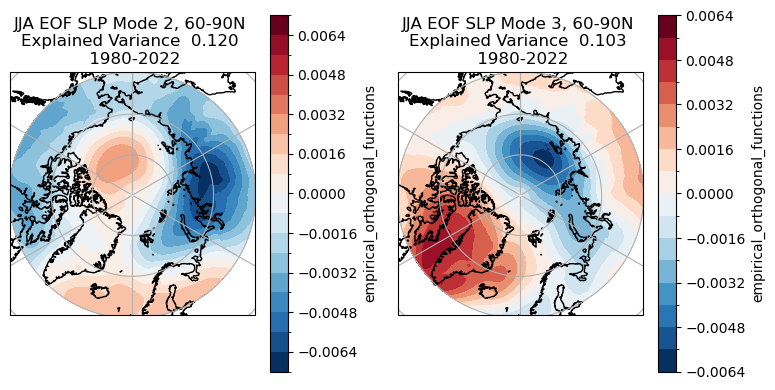

In [55]:
fig = plt.figure(figsize=(15, 4))
for i in range(1, 3):
   ax = plt.subplot(1, 4, i+1, projection=ccrs.NorthPolarStereo())
   im = eof2.isel(mode=i).plot.contourf(transform=ccrs.PlateCarree(), levels=20, ax=ax)
#sumr_eofs.isel(mode=i).plot(transform=ccrs.PlateCarree(), ax=ax)
   ax.add_feature(cfeature.COASTLINE)
   ax.gridlines()
   ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
   ax.set_title(f"{season} EOF SLP Mode {i+1}, 60-90N \nExplained Variance {variance_fractions[i].values: .3f} \n {startyr}-{endyr}")
plt.tight_layout()

### Zak's code

In [111]:
#selecting months 6,7,8 (June July August) for summer data
#selecting months 12, 1, 2 (december January, february) for winter data
#we have to account for th efact the a winter season contains the december from the previous year
#when grouped with january and february

msl_sumr = msl.sel(valid_time=msl['valid_time.month'].isin([6, 7, 8]))
msl_wint = msl.sel(valid_time=msl['valid_time.month'].isin([12, 1]))
msl_sumr_months = msl_sumr.groupby('valid_time.year').mean()
msl_sumr_months.shape


(41, 121, 1440)

(array([  74391.,  109464.,  383032.,  868206., 1678452., 1906255.,
        1236390.,  501091.,  267092.,  119467.]),
 array([-8.40710449, -6.80361319, -5.20012188, -3.59663105, -1.99313974,
        -0.38964844,  1.21384239,  2.81733418,  4.420825  ,  6.02431583,
         7.62780762]),
 <BarContainer object of 10 artists>)

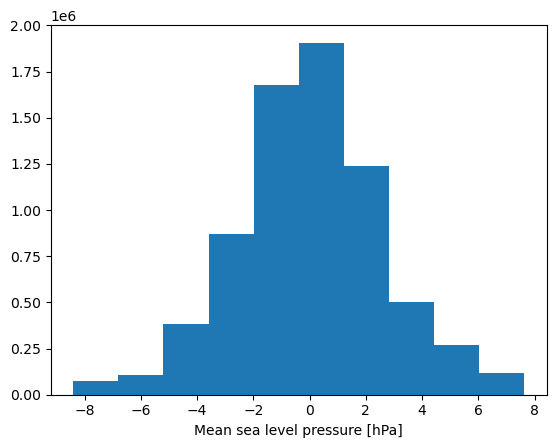

In [112]:
msl_sumr_months_ds = msl_sumr_months - msl_sumr_months.mean(dim = 'year') #de-seasoned summer months (anomalies)
msl_sumr_months_ds.plot()


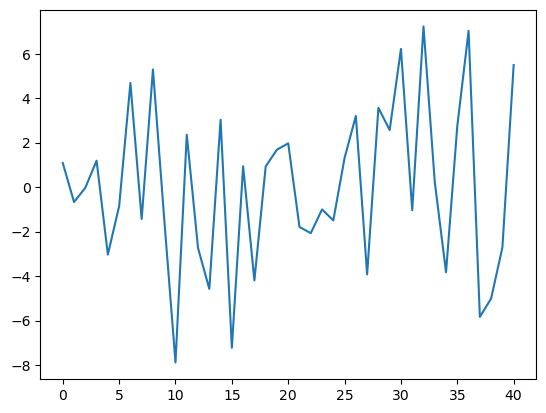

In [113]:
#look at MSL anomalies vs time for one grid box (grid box chosen at random - OK?
plt.plot(msl_sumr_months_ds[:, 2, 2])

In [114]:
sumr_model = xe.single.EOF(n_modes=2, use_coslat=True)
sumr_model.fit(msl_sumr_months_ds, dim='year')
sumr_eofs = sumr_model.components()
sumr_pcs = sumr_model.scores()
sumr_expvar = sumr_model.explained_variance_ratio()

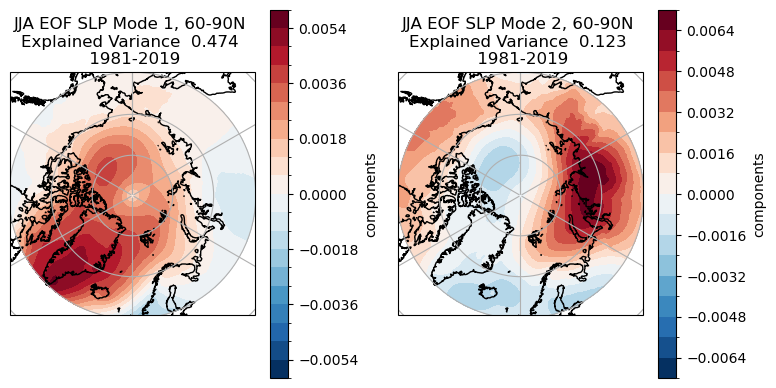

In [115]:
fig = plt.figure(figsize=(15, 4))
for i in range(2):
   ax = plt.subplot(1, 4, i+1, projection=ccrs.NorthPolarStereo())
   sumr_eofs.isel(mode=i).plot.contourf(transform=ccrs.PlateCarree(), levels=20, ax=ax)
   ax.add_feature(cfeature.COASTLINE)
   ax.gridlines()
   ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
   ax.set_title(f"JJA EOF SLP Mode {i+1}, 60-90N \nExplained Variance {sumr_expvar[i].values: .3f} \n 1981-2019")
plt.tight_layout()
plt.show()

In [ ]:
"""

def detrend_dim(da, dim, deg=1):
    p = da.polyfit(dim=dim, deg=deg)
    fit = xr.polyval(da.coords[dim], p.polyfit_coefficients)
    return da - fit

msl_sumr_months_dt = detrend_dim(msl_sumr_months, 'year', deg=1)

"""

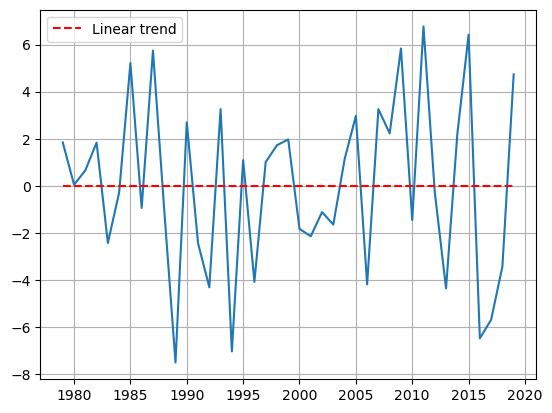

In [ ]:
"""

# plot the data and a linear fit - was the de-trend successful?
x = msl_sumr_months_dt.year[:]
y = msl_sumr_months_dt[:, 2, 2]  # Y-axis values

# Calculate the linear regression
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)

# Create the plot
plt.plot(x, y)  # Original data
plt.plot(x, polynomial(x), 'r--', label='Linear trend')  # Regression line
plt.legend()
plt.grid(True)


"""

In [ ]:

"""

#Find the trend over time for each grid point:

slope = np.zeros((121, 1440))
intercept = np.zeros((121, 1440))

x = np.arange(39)  # years 0-38
for i in range(121):
    for j in range(1440):
        coeffs = np.polyfit(x, msl_sumr_months_ds.isel(latitude=i, longitude=j).values, 1)
        slope[i,j] = coeffs[0]
        intercept[i,j] = coeffs[1]

# Convert to DataArray if needed
#slope_da = xr.DataArray(slope, dims=['latitude', 'longitude'])

"""

In [119]:
"""


fig = plt.figure(figsize=(15,8))
ax = plt.axes(projection=ccrs.NorthPolarStereo())
cs = ax.contourf(msl_sumr_months_ds.longitude, msl_sumr_months_ds.latitude, 
                 slope, transform=ccrs.PlateCarree(), levels=10)
plt.colorbar(cs)
ax.add_feature(cfeature.COASTLINE)
ax.gridlines()
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())


"""

'\n\n\nfig = plt.figure(figsize=(15,8))\nax = plt.axes(projection=ccrs.NorthPolarStereo())\ncs = ax.contourf(msl_sumr_months_ds.longitude, msl_sumr_months_ds.latitude, \n                 slope, transform=ccrs.PlateCarree(), levels=10)\nplt.colorbar(cs)\nax.add_feature(cfeature.COASTLINE)\nax.gridlines()\nax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())\n\n\n'

In [120]:
"""


#to account for the unequal area of lat/long grids we weight them by the square root of the cosine of the latitude
#this goes to zero as Lat-->90degrees. Some people will only use the cosine (not the square root). Needs further investigation.

def global_average(data):
    weights = np.sqrt(np.cos(np.deg2rad(data.latitude)))
    data_weighted = data.weighted(weights)
    return data_weighted.mean(dim=['latitude', 'longitude'], skipna=True)
#this is taking weighted means over spatial dimensions


"""

"\n\n\n#to account for the unequal area of lat/long grids we weight them by the square root of the cosine of the latitude\n#this goes to zero as Lat-->90degrees. Some people will only use the cosine (not the square root). Needs further investigation.\n\ndef global_average(data):\n    weights = np.sqrt(np.cos(np.deg2rad(data.latitude)))\n    data_weighted = data.weighted(weights)\n    return data_weighted.mean(dim=['latitude', 'longitude'], skipna=True)\n#this is taking weighted means over spatial dimensions\n\n\n"

Text(0.5, 1.0, 'Summer AO (PC2) not normalized')

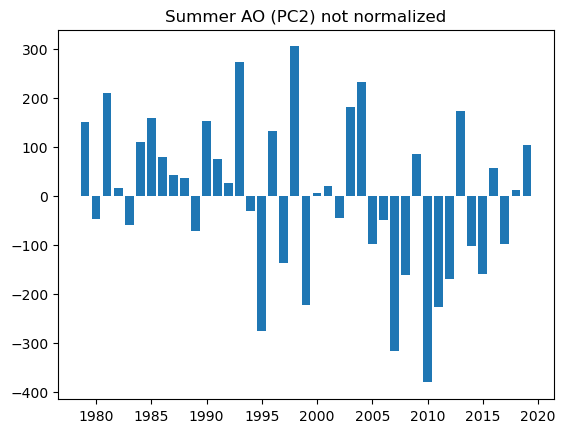

In [121]:
#plt.bar(sumr_pcs.year, sumr_pcs.values[0, :], label='PC1')
plt.bar(sumr_pcs.year, sumr_pcs.values[1, :], label='PC2')
plt.title("Summer AO (PC2) not normalized")

In [122]:
sumr_pcs[1]

<xarray.DataArray 'scores' (year: 41)> Size: 328B
array([ 151.83362562,  -46.29142595,  210.62760908,   15.55762477,
        -58.87969054,  110.79582806,  159.00003753,   78.69977996,
         42.75821102,   37.67873685,  -72.07502235,  152.74565347,
         75.47300729,   27.41576146,  273.93277234,  -30.555955  ,
       -275.26060535,  133.36167203, -136.43505282,  305.35193039,
       -223.27701243,    6.48362454,   20.84222991,  -43.99628763,
        181.82738654,  233.54221596,  -97.50827937,  -49.84770376,
       -317.15866442, -161.40300155,   84.7790393 , -380.85291575,
       -227.09510155, -169.18477525,  174.10866533, -101.66609667,
       -160.26952023,   57.14313935,  -98.48099651,   11.43384827,
        104.84570785])
Coordinates:
  * year     (year) int64 328B 1979 1980 1981 1982 1983 ... 2016 2017 2018 2019
    mode     int64 8B 2
Attributes: (12/15)
    model:          EOF analysis
    software:       xeofs
    version:        3.0.4
    date:           2025-03-04 01:12:25
    n_modes:        2
    center:         True
    ...             ...
    sample_name:    sample
    feature_name:   feature
    random_state:   None
    compute:        True
    solver:         auto
    solver_kwargs:  {}

In [123]:
print(sumr_pcs.values.shape)
print(sumr_pcs.year.shape)

(2, 41)
(41,)


## AND NOW FIGURE OUT THE WINTER STUFF

In [124]:
msl_wint.shape

(80, 121, 1440)

In [163]:
msl_wint['season_year'] = msl_wint['valid_time.year']
msl_wint['season_year'] = xr.where(msl_wint['valid_time.month'] == 12, 
                                  msl_wint['valid_time.year'] + 1, 
                                  msl_wint['valid_time.year'])

In [164]:
df07 = pd.DataFrame({
    'valid_time': msl_wint.valid_time[:20].values,
    'season_year': msl_wint.season_year[:20].values,
    'MSL': msl_wint[:20, 2, 2].values
})
print(df07)


   valid_time  season_year          MSL
0  1979-12-01         1980  1005.798767
1  1980-01-01         1980  1024.932495
2  1980-12-01         1981  1018.014404
3  1981-01-01         1981  1002.478149
4  1981-12-01         1982  1020.182495
5  1982-01-01         1982  1019.380615
6  1982-12-01         1983  1018.003723
7  1983-01-01         1983  1013.931885
8  1983-12-01         1984  1018.233765
9  1984-01-01         1984  1013.765015
10 1984-12-01         1985  1014.407471
11 1985-01-01         1985  1023.818115
12 1985-12-01         1986  1032.696289
13 1986-01-01         1986  1022.840027
14 1986-12-01         1987  1014.257507
15 1987-01-01         1987  1014.076233
16 1987-12-01         1988  1025.361206
17 1988-01-01         1988  1010.553772
18 1988-12-01         1989   996.515625
19 1989-01-01         1989  1002.023743


In [165]:
msl_wint_season = msl_wint.groupby('season_year').mean()

In [166]:
df08 = pd.DataFrame({
    
    'season_year': msl_wint_season.season_year[:20].values,
    'MSL': msl_wint_season[:20, 2, 2].values
})
print(df08)

    season_year          MSL
0          1980  1015.365601
1          1981  1010.246277
2          1982  1019.781555
3          1983  1015.967773
4          1984  1015.999390
5          1985  1019.112793
6          1986  1027.768188
7          1987  1014.166870
8          1988  1017.957520
9          1989   999.269653
10         1990  1015.263794
11         1991  1012.369019
12         1992  1003.136536
13         1993  1004.082153
14         1994  1029.522461
15         1995  1015.788452
16         1996  1012.187195
17         1997  1016.270630
18         1998  1019.509644
19         1999  1014.255920


In [167]:
msl_wint_mean = msl_wint_season.mean(dim = 'season_year')

In [168]:
msl_wint_ds = msl_wint_season - msl_wint_mean

In [169]:
#msl_wint_mean

In [170]:
df03 = pd.DataFrame({
    'valid_time': msl_wint.valid_time[:20].values,
    'season_year': msl_wint.season_year[:20].values,
    'MSL': msl_wint[:20, 2, 2].values
})
print(df03)

   valid_time  season_year          MSL
0  1979-12-01         1980  1005.798767
1  1980-01-01         1980  1024.932495
2  1980-12-01         1981  1018.014404
3  1981-01-01         1981  1002.478149
4  1981-12-01         1982  1020.182495
5  1982-01-01         1982  1019.380615
6  1982-12-01         1983  1018.003723
7  1983-01-01         1983  1013.931885
8  1983-12-01         1984  1018.233765
9  1984-01-01         1984  1013.765015
10 1984-12-01         1985  1014.407471
11 1985-01-01         1985  1023.818115
12 1985-12-01         1986  1032.696289
13 1986-01-01         1986  1022.840027
14 1986-12-01         1987  1014.257507
15 1987-01-01         1987  1014.076233
16 1987-12-01         1988  1025.361206
17 1988-01-01         1988  1010.553772
18 1988-12-01         1989   996.515625
19 1989-01-01         1989  1002.023743


In [171]:
df05 = pd.DataFrame({
    'season_year': msl_wint_season.season_year[:20].values,
    'MSL_wint_mean': msl_wint_season[:20, 2, 2].values,
    'season_year_ds': msl_wint_ds.season_year[:20].values,
    'MSL_season_anomaly': msl_wint_ds[:20, 2, 2].values,
    'mean_all_years' : msl_wint_mean[2, 2].values
})
df05

,season_year,MSL_wint_mean,season_year_ds,MSL_season_anomaly,mean_all_years
0,1980,1015.365601,1980,0.696533,1014.669067
1,1981,1010.246277,1981,-4.422791,1014.669067
2,1982,1019.781555,1982,5.112488,1014.669067
3,1983,1015.967773,1983,1.298706,1014.669067
4,1984,1015.999390,1984,1.330322,1014.669067
5,1985,1019.112793,1985,4.443726,1014.669067
6,1986,1027.768188,1986,13.099121,1014.669067
7,1987,1014.166870,1987,-0.502197,1014.669067
8,1988,1017.957520,1988,3.288452,1014.669067
9,1989,999.269653,1989,-15.399414,1014.669067


In [172]:
#plt.plot(msl_wint_ds[:, 2,2])

In [173]:
#print(msl_wint_ds)

In [174]:
#msl_wint_season[:, 2, 2] #it worked! these averages have been verified

In [175]:
"""

# plot the data and a linear fit - do we need to de-trend?
x = msl_wint_season.season_year[:]
y = msl_wint_season[:, 2, 2]  # Y-axis values

# Calculate the linear regression
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)

# Create the plot
plt.plot(x, y)  # Original data
plt.plot(x, polynomial(x), 'r--', label='Linear trend')  # Regression line
plt.legend()
plt.grid(True)

"""

"\n\n# plot the data and a linear fit - do we need to de-trend?\nx = msl_wint_season.season_year[:]\ny = msl_wint_season[:, 2, 2]  # Y-axis values\n\n# Calculate the linear regression\ncoefficients = np.polyfit(x, y, 1)\npolynomial = np.poly1d(coefficients)\n\n# Create the plot\nplt.plot(x, y)  # Original data\nplt.plot(x, polynomial(x), 'r--', label='Linear trend')  # Regression line\nplt.legend()\nplt.grid(True)\n\n"

In [176]:
"""

def detrend_dim(da, dim, deg=1):
    p = da.polyfit(dim=dim, deg=deg)
    fit = xr.polyval(da.coords[dim], p.polyfit_coefficients)
    return da - fit

msl_wint_season_dt = detrend_dim(msl_wint_season, 'season_year', deg=1)

"""

"\n\ndef detrend_dim(da, dim, deg=1):\n    p = da.polyfit(dim=dim, deg=deg)\n    fit = xr.polyval(da.coords[dim], p.polyfit_coefficients)\n    return da - fit\n\nmsl_wint_season_dt = detrend_dim(msl_wint_season, 'season_year', deg=1)\n\n"

In [177]:
"""

# plot the data and a linear fit - was the de-trend successful?
x = msl_wint_season_dt.season_year[:]
y = msl_wint_season_dt[:, 2, 2]  # Y-axis values

# Calculate the linear regression
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)

# Create the plot
plt.plot(x, y)  # Original data
plt.plot(x, polynomial(x), 'r--', label='Linear trend')  # Regression line
plt.legend()
plt.grid(True)

"""

"\n\n# plot the data and a linear fit - was the de-trend successful?\nx = msl_wint_season_dt.season_year[:]\ny = msl_wint_season_dt[:, 2, 2]  # Y-axis values\n\n# Calculate the linear regression\ncoefficients = np.polyfit(x, y, 1)\npolynomial = np.poly1d(coefficients)\n\n# Create the plot\nplt.plot(x, y)  # Original data\nplt.plot(x, polynomial(x), 'r--', label='Linear trend')  # Regression line\nplt.legend()\nplt.grid(True)\n\n"

In [178]:
#winter modes 

wint_model = xe.single.EOF(n_modes=2, use_coslat=True)
wint_model.fit(msl_wint_ds, dim='season_year')
wint_eofs = wint_model.components()
wint_pcs = wint_model.scores()
wint_expvar = wint_model.explained_variance_ratio()

In [179]:
wint_eofs.shape

(2, 121, 1440)

In [180]:
wint_pcs.shape

(2, 40)

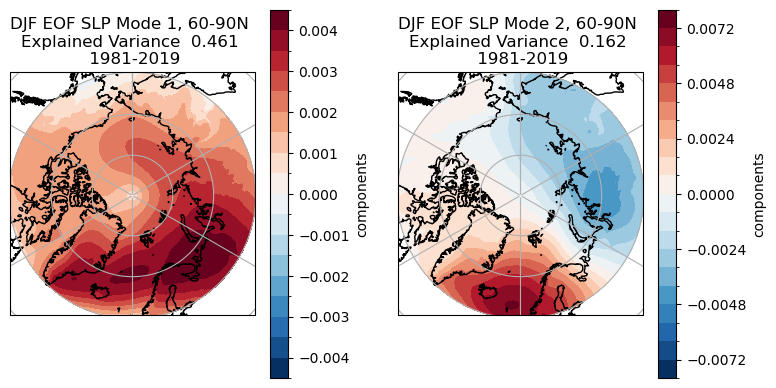

In [181]:
fig = plt.figure(figsize=(15, 4))
for i in range(2):
   ax = plt.subplot(1, 4, i+1, projection=ccrs.NorthPolarStereo())
   wint_eofs.isel(mode=i).plot.contourf(transform=ccrs.PlateCarree(), levels=20, ax=ax)
#wint_eofs.isel(mode=i).plot(transform=ccrs.PlateCarree(), ax=ax)
   ax.add_feature(cfeature.COASTLINE)
   ax.gridlines()
   ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
   ax.set_title(f"DJF EOF SLP Mode {i+1}, 60-90N \nExplained Variance {wint_expvar[i].values: .3f} \n 1981-2019")
plt.tight_layout()
plt.show()

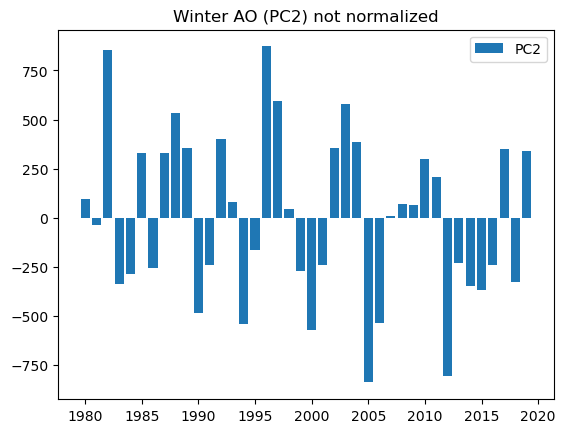

In [182]:
#plt.bar(sumr_pcs.year, sumr_pcs.values[0, :], label='PC1')
plt.bar(wint_pcs.season_year, wint_pcs.values[1, :], label='PC2')
plt.title("Winter AO (PC2) not normalized")
plt.legend()

## check december shift winter EOFs by using just january and february

In [244]:
msl_wint_jf = msl.sel(valid_time=msl['valid_time.month'].isin([1, 2]))

In [245]:
msl_wint_jf

<xarray.DataArray 'msl' (valid_time: 78, latitude: 121, longitude: 1440)> Size: 54MB
[13590720 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 624B 1981-01-01 ... 2019-02-01
  * latitude    (latitude) float64 968B 90.0 89.75 89.5 ... 60.5 60.25 60.0
  * longitude   (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
    expver      (valid_time) <U4 1kB ...
Attributes: (12/32)
    GRIB_paramId:                             151
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      174240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avgua
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               Pa
    long_name:                                Mean sea level pressure
    units:                                    Pa
    standard_name:                            air_pressure_at_mean_sea_level
    GRIB_surface:                             0.0

In [246]:
msl_wint_jf.shape

(78, 121, 1440)

In [247]:
msl_wint_jf_months = msl_wint_jf.groupby('valid_time.year').mean()

In [248]:
msl_wint_jf_months.shape

(39, 121, 1440)

In [249]:
msl_wint_jf_mean = msl_wint_jf_months.mean(dim = "year")

In [250]:
msl_wint_jf_mean.shape

(121, 1440)

In [251]:
msl_wint_jf_anomalies = msl_wint_jf_months - msl_wint_jf_mean

In [252]:
#msl_wint_jf_anomalies

In [253]:
#winter modes (j, f, not december)

wint_jf_model = xe.single.EOF(n_modes=2, use_coslat=True)
wint_jf_model.fit(msl_wint_jf_anomalies, dim='year')
wint_jf_eofs = wint_jf_model.components()
wint_jf_pcs = wint_jf_model.scores()
wint_jf_expvar = wint_jf_model.explained_variance_ratio()

/opt/anaconda3/envs/xeofs_env/lib/python3.11/site-packages/shapely/constructive.py:180: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/xeofs_env/lib/python3.11/site-packages/shapely/constructive.py:180: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/xeofs_env/lib/python3.11/site-packages/shapely/constructive.py:180: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/xeofs_env/lib/python3.11/site-packages/shapely/constructive.py:180: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


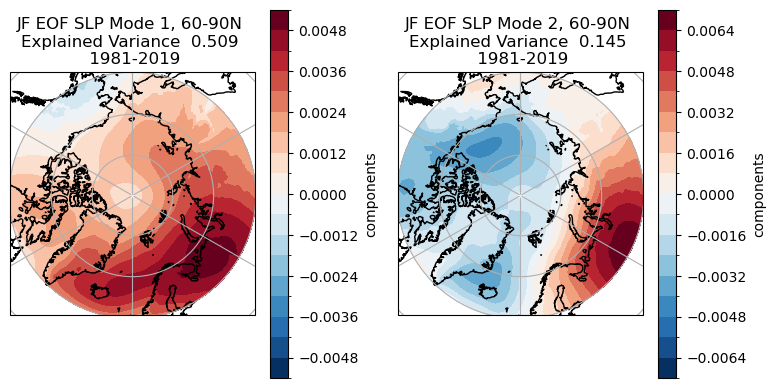

In [254]:
fig = plt.figure(figsize=(15, 4))
for i in range(2):
   ax = plt.subplot(1, 4, i+1, projection=ccrs.NorthPolarStereo())
   wint_jf_eofs.isel(mode=i).plot.contourf(transform=ccrs.PlateCarree(), levels=20, ax=ax)
#wint_eofs.isel(mode=i).plot(transform=ccrs.PlateCarree(), ax=ax)
   ax.add_feature(cfeature.COASTLINE)
   ax.gridlines()
   ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
   ax.set_title(f"JF EOF SLP Mode {i+1}, 60-90N \nExplained Variance {wint_expvar[i].values: .3f} \n 1981-2019")
plt.tight_layout()
plt.show()

## IF detrending, code below may be helpful

In [94]:
#de-season the data before de-trending

#to find the anomalies for June (for example), we average the msl for all the Junes (climatology),
#then subtract that value from the msl value for each June
sumr_climatology = msl_sumr.groupby('valid_time.month').mean()
sumr_anomalies = msl_sumr.groupby('valid_time.month') - sumr_climatology

wint_climatology = msl_wint.groupby('valid_time.month').mean()
wint_anomalies = msl_wint.groupby('valid_time.month') - wint_climatology

#maybe should be calculating average for each winter and summer, then de_season and de-trend?
#code for finding winter and summer anomalies, instead of monthly (for winter and summer) below:

In [95]:
sumr_climatology.shape

(3, 121, 1440)

In [96]:
sumr_anomalies.shape

(117, 121, 1440)

In [97]:
sumr_yearly_anomalies = sumr_anomalies.groupby('valid_time.year').mean()

In [98]:
sumr_yearly_anomalies.shape

(39, 121, 1440)

In [99]:
print(sumr_yearly_anomalies['valid_time.year' == 1983])

<xarray.DataArray 'msl' (latitude: 121, longitude: 1440)> Size: 697kB
array([[ 13.3880205,  13.3880205,  13.3880205, ...,  13.3880205,
         13.3880205,  13.3880205],
       [  5.8203125,   5.8020835,   5.7734375, ...,   5.9296875,
          5.908854 ,   5.890625 ],
       [ -1.6692709,  -1.7473959,  -1.7526041, ...,  -1.4895834,
         -1.5625   ,  -1.6197916],
       ...,
       [-25.867188 , -27.213541 , -28.539062 , ..., -21.963541 ,
        -23.309896 , -24.609375 ],
       [-18.822916 , -20.213541 , -21.627604 , ..., -14.7421875,
        -16.054688 , -17.460938 ],
       [-11.671875 , -13.088542 , -14.5286455, ...,  -7.3072915,
         -8.7838545, -10.2161455]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 968B 90.0 89.75 89.5 89.25 ... 60.5 60.25 60.0
  * longitude  (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
    year       int64 8B 1981
Attributes: (12/32)
    GRIB_paramId:                             151
    GRIB_dataType:              

In [100]:
#wint_anomalies_mean - modify this code 
# For winter (DJF), we'll assign December to the next year's winter
wint_anomalies['season_year'] = wint_anomalies['valid_time.year']
if wint_anomalies.valid_time.month == 12:
    msl_wint['season_year'] == msl_wint['valid_time.year'] + 1

# Calculate winter averages (DJF)
#winter_df = df[df['month'].isin([12, 1, 2])].copy()
#winter_means = winter_df.groupby('season_year')['ao_index_2'].mean()



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
#sumr_climatology.shape

In [ ]:
#sumr_anomalies.shape

In [ ]:
#to account for the unequal area of lat/long grids we weight them by the square root of the cosine of the latitude
#this goes to zero as Lat-->90degrees. Some people will only use the cosine (not the square root). Needs further investigation.

def global_average(data):
    weights = np.sqrt(np.cos(np.deg2rad(data.latitude)))
    data_weighted = data.weighted(weights)
    return data_weighted.mean(dim=['latitude', 'longitude'], skipna=True)
#this is taking weighted means over spatial dimensions

In [ ]:
#to "detrend" the data (this is important with sst data, but 
#does it even matter for slp? Solving both ways prodeces different results so i guess "yes"
#this cell is not finding the mean over time, but only over space.(?)
#an individual value for each time step

#squeeze gets rid of the single dimension in the data matrix. Is that time in this case? still don't understand squueze.
sumr_anomalies_detrended = (sumr_anomalies - global_average(msl_sumr)).squeeze()
wint_anomalies_detrended = (wint_anomalies - global_average(msl_wint)).squeeze()
#for each month and each gridpoint, this subtracts the spatial average for that month from each value (month, grid point)
#do we instead need the time average for each gridpoint?

In [ ]:
#global_average(msl_sumr).shape
#no longer has latitude and longitude info.
#this is the average pressure over all lat/long for each value of time
#don't we need to use these values to find the trend, from which to subtract pressure values?

In [ ]:
#plt.plot(global_average(msl_sumr))

In [ ]:
#sumr_mean_msl = (global_average(msl_sumr)).mean()
#wint_mean_msl = (global_average(msl_wint)).mean()
#this finds one mean value for msl over both space and time
#I think the detrended anomalies should be calculated using this, rather than global_vaerage(msl_wint)

In [ ]:
#either use this cell or the one below it
#sumr_anomalies_mean_detrended = (sumr_anomalies_mean - sumr_mean_msl).squeeze()

In [ ]:
#to "detrend" the data (this is important with sst data, but 
#does it even matter for slp? Solving both ways prodeces different results so i guess "yes"

#squeeze gets rid of the single dimension in the data matrix. Is that time in this case?
#sumr_anomalies_detrended = (sumr_anomalies - sumr_mean_msl).squeeze()
#wint_anomalies_detrended = (wint_anomalies - wint_mean_msl).squeeze()


In [ ]:
#sumr_anomalies_mean_detrended.shape

In [ ]:
#sumr_anomalies.squeeze().shape
#what is squeeze doing here?

In [ ]:
#sumr_anomalies_detrended.shape

In [ ]:
#sumr_anomalies_detrended.valid_time

In [ ]:
#try the winter season WITH detrending
wint_ds_model_dt = xe.single.EOF(n_modes=2, use_coslat=False)
wint_ds_model_dt.fit(wint_anomalies_detrended, dim='valid_time')
wint_ds_eofs_dt = wint_ds_model_dt.components() #EOFs (spatial patterns)
wint_ds_pcs_dt = wint_ds_model_dt.scores() #PCs (temporal patterns)
wint_ds_expvar_dt = wint_ds_model_dt.explained_variance_ratio()

In [ ]:
wint_ds_pcs_dt.shape

In [ ]:
DJF_pcs_1 = wint_ds_pcs_dt[0].to_dataframe().to_csv('/Users/zacharytourville/Downloads/djf_pcs_1_AO.csv')
DJF_pcs_2 = wint_ds_pcs_dt[1].to_dataframe().to_csv('/Users/zacharytourville/Downloads/djf_pcs_2_AD.csv')

In [ ]:
print(wint_ds_expvar_dt)

In [ ]:
#try plotting the winter modes WITH detrending
fig = plt.figure(figsize=(15, 4))
for i in range(2):
   ax = plt.subplot(1, 2, i+1, projection=ccrs.NorthPolarStereo())
   wint_ds_eofs_dt.isel(mode=i).plot.contour(transform=ccrs.PlateCarree(), levels=10, ax=ax)
   wint_ds_eofs_dt.isel(mode=i).plot(transform=ccrs.PlateCarree(), ax=ax)
   ax.add_feature(cfeature.COASTLINE)
   ax.gridlines()
   ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
   ax.set_title(f"DJF EOF SLP Mode {i+1}, 60-90N \nExplained Variance {wint_ds_expvar_dt[i].values: .3f} \n 1981-2019")
plt.tight_layout()
plt.show()

In [ ]:
#summer modes with detrending

sumr_ds_model_dt = xe.single.EOF(n_modes=2, use_coslat=False)
sumr_ds_model_dt.fit(sumr_anomalies_detrended, dim='valid_time')
sumr_ds_eofs_dt = sumr_ds_model_dt.components()
sumr_ds_pcs_dt = sumr_ds_model_dt.scores()
sumr_ds_expvar_dt = sumr_ds_model_dt.explained_variance_ratio()

In [ ]:
fig = plt.figure(figsize=(15, 4))
for i in range(2):
   ax = plt.subplot(1, 2, i+1, projection=ccrs.NorthPolarStereo())
   sumr_ds_eofs_dt.isel(mode=i).plot.contour(transform=ccrs.PlateCarree(), levels=10, ax=ax)
   sumr_ds_eofs_dt.isel(mode=i).plot(transform=ccrs.PlateCarree(), ax=ax)
   ax.add_feature(cfeature.COASTLINE)
   ax.gridlines()
   ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
   ax.set_title(f"JJA EOF SLP Mode {i+1}, 60-90N\nExplained Variance {sumr_ds_expvar_dt[i].values:.3f} \n1981-2019")
plt.tight_layout()
plt.show()

In [ ]:
JJA_pcs_1 = wint_ds_pcs_dt[0].to_dataframe().to_csv('/Users/zacharytourville/Downloads/jja_pcs_1_AO.csv')
JJA_pcs_2 = wint_ds_pcs_dt[1].to_dataframe().to_csv('/Users/zacharytourville/Downloads/jja_pcs_2_AD.csv')

print(sumr_ds_expvar_dt[0].values)

sumr_mean_ds_model = xe.single.EOF(n_modes=2, use_coslat=True)
sumr_mean_ds_model.fit(sumr_anomalies_mean_detrended, dim='year')
sumr_mean_ds_eofs = sumr_mean_ds_model.components()
sumr_mean_ds_pcs = sumr_mean_ds_model.scores()
sumr_mean_ds_expvar = sumr_mean_ds_model.explained_variance_ratio()

In [ ]:
print(sumr_mean_ds_expvar)

In [ ]:
fig = plt.figure(figsize=(15, 4))
for i in range(2):
   ax = plt.subplot(1, 4, i+1, projection=ccrs.NorthPolarStereo())
   sumr_mean_ds_eofs.isel(mode=i).plot.contour(transform=ccrs.PlateCarree(), levels=10, ax=ax)
   sumr_mean_ds_eofs.isel(mode=i).plot(transform=ccrs.PlateCarree(), ax=ax)
   ax.add_feature(cfeature.COASTLINE)
   ax.gridlines()
   ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
   #ax.title="JJA EOF SLP"
plt.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize=(15, 4))
for i in range(2):
   ax = plt.subplot(1, 4, i+1, projection=ccrs.NorthPolarStereo())
   sumr_ds_eofs.isel(mode=i).plot.contour(transform=ccrs.PlateCarree(), levels=10, ax=ax)
   sumr_ds_eofs.isel(mode=i).plot(transform=ccrs.PlateCarree(), ax=ax)
   ax.add_feature(cfeature.COASTLINE)
   ax.gridlines()
   ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
   #ax.title="JJA EOF SLP"
plt.tight_layout()
plt.show()

In [ ]:
sumr_ds_eofs.plot()
